In [2]:
# 12/01/25: signal injection test
#author: Orion Ning

%load_ext autoreload
%autoreload 2

import numpy as np
import sys
#sys.path.append('../Python')
# The Primakoff calculation refers to /Python/Primakoff.py
#from Primakoff import Primakoff

import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
from matplotlib import colors as mplcolors

# Import Chris' code
#ORION CHANGE TO CURRENT FILE PATH
#sys.path.append('/clusterfs/heptheory/dessert/code/misc/')
#sys.path.append('/nfs/turbo/bsafdi/dessert/white-dwarf-axion/x_ray_flux/python/')
#import response_matrix as rm

#import h5py

import csv
from scipy import interpolate

import scipy
from scipy import integrate

from scipy.integrate import quad

from mpl_toolkits.mplot3d import Axes3D

import superrad_fns as sr

from scipy.integrate import quad
from scipy.special import gamma, factorial

from scipy.optimize import root_scalar
from scipy.optimize import fsolve

from scipy.stats import gaussian_kde

from scipy import optimize, special
from scipy.stats import beta


#sys.path.append("/clusterfs/heptheory/brsafdi/brsafdi/transfer/bsafdi/github/gmf") #"/global/cfs/cdirs/m3166/bsafdi/gmf")
#import gmf
#import pygedm

#import mesa_reader as mr

import bilby
from bilby.core.utils import random

import corner

import glob
import time

#for LaTeX on Lawrencium
import os
os.environ["PATH"] = '/global/software/sl-7.x86_64/modules/tools/texlive/2016/bin/x86_64-linux/:' + os.environ["PATH"]

##############
#For plotting
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

from matplotlib import rc
from matplotlib import rcParams
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
#rcParams['text.fontsize'] = 16


import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

In [3]:
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# Line styles
import matplotlib as mpl
#mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.labelpad'] = 10.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
mpl.rcParams['figure.figsize'] = 7,7

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24


fontsize=30
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# 11/04/25: Superradiance Setup

In [4]:
#let's set up our superrad

#in this function, we try to implement 1908.02312 as closely as possible
#this involves many approximations
#note here, n,l,m different definitions

#TO DO: figure out natural units --> actual units

#constants
c = 3.0e8 #m/s
G = 6.67e-11 #mks
hbar = 6.582e-16 #eV*s
Msol_to_kg = 1.98e30 #Msol to kg
Msol_to_eV = 1.115e66
s_to_yr = 3.17e-8
yr_to_s = 1.0/s_to_yr

G_over_hbar_c3 = G /(hbar* c**3)
#print(G_over_hbar_c3)

eV_to_inv_s = 1.519e15 #1 eV ~ 1.519e15 inv s

tau_uni=1.38e10
tau_uni_s = tau_uni / s_to_yr

def Gamma_inst(n, l, m, mu, M, chi):
    #print("n, l, m: ", np.array([n, l, m]))
    
    r_plus = M * Msol_to_kg * (1 + np.sqrt(1 - chi**2))
    
    fac1 = eV_to_inv_s * mu * (G_over_hbar_c3 * mu*M*Msol_to_kg)**(4*l+4) * (m*chi - 2*G_over_hbar_c3*mu*r_plus)
    #print('fac1: ', fac1)
    fac2 = (2**(4*l+2) * factorial(2*l+1+n)) / ((l+1+n)**(2*l+4) * factorial(n))
    #print('fac2: ', fac2)
    fac3 = (factorial(l) / (factorial(2*l) * factorial(2*l+1)))**2
    #print('fac3: ', fac3)
    k_arr = np.arange(1, l+1)
    k_prod = k_arr**2 * (1-chi)**2 + np.ones_like(k_arr)*((m*chi - 2*G_over_hbar_c3*mu*r_plus)**2)
    #print('k_prod: ', k_prod)
    
    return fac1*fac2*fac3*np.prod(k_prod)

def tau_inst(n, l, m, mu, M, chi):
    return 1.0/(Gamma_inst(n, l, m, mu, M, chi)) #in seconds


def solve_chi(n, l, m, mu, M, tau_s, chi_guess=0.5):
    
    #solve for chi such that Gamma_inst(n,l,m,mu,M,chi) = 1/tau_s
    #tau_s should be same units -- i.e. seconds
    
    target = 1.0 / tau_s

    def f(chi):
        return Gamma_inst(n, l, m, mu, M, chi) - target

    # solve using the secant method (no derivative needed)
    '''
    try:
        sol = root_scalar(f, x0=chi_guess, x1=chi_guess*1.1, method="secant")
        return sol.root
    except:
        print("Root finding did not converge")
        return np.nan
    '''
    #if not sol.converged:
    #    raise RuntimeError("Root finding did not converge.")

    #try fsolve method
    sol = fsolve(f, 0.99, xtol=1e-12)
    return sol

    

def get_highest_mode(n, mu, M, chi_F, tau_s):
    #max_mode = 3
    m_counter = 1

    tau_grow = 180 * tau_inst(n, m_counter, m_counter, mu, M, chi_F)
    chi_counter = solve_chi(n, m_counter, m_counter, mu, M, tau_s)

    if chi_F < chi_counter:
        ##print("chi_F > chi not satisfied -- no superradiance")
        #print("n, mu, M, chi_F, tau_s: ", np.array([n, mu, M, chi_F, tau_s]))
        return np.nan

    if tau_grow > tau_s:
        ##print("tau_s > tau_growth condition not satisfied -- no superradiance")
        #print("n, mu, M, chi_F, tau_s: ", np.array([n, mu, M, chi_F, tau_s]))
        return np.nan
    
    else:
        for i in range(3): #only max m~3 according to the paper
            chi_counter_previous = np.copy(chi_counter)
            
            m_counter += 1
    
            tau_grow = 180*tau_inst(n, m_counter, m_counter, mu, M, chi_counter)
            if tau_grow > tau_s:
                return m_counter-1
                
            chi_counter = solve_chi(n, m_counter, m_counter, mu, M, tau_s)

            if chi_counter > chi_counter_previous:
                ##print("New spin larger than old spin -- unphysical")
                return m_counter-1
        #print("Reached end of get_highest_mode without satisfying any condition — returning np.nan")
        return np.nan

def get_merger_spin(mu, M, chi_F, tau_s, n=0, m_choose=1, mode_flag=False, debug_flag=False):
    
    if mode_flag:
        max_mode = m_choose
        n = max_mode-1
    else:
        max_mode = get_highest_mode(n, mu, M, chi_F, tau_s)
        #print("max mode: ", max_mode)
        if np.any(np.isnan(max_mode)): #no superradiance
            #print("returning")
            return chi_F
        n = max_mode-1
    if debug_flag:
        print("max mode: ", max_mode)
    #focusing only on n = 0
    final_spin = solve_chi(n, max_mode, max_mode, mu, M, tau_s)[0]
    ##print("Successful, final_spin: ", final_spin)
    return final_spin

In [21]:
#let's test things

M = 60.0 #5 M_sol
mu = 1.0e-12 #eV
chi = 1.0
n, l, m = 0, 1, 1

print("M (M_sol): ", M)
print("mu (eV): ", mu)
print("chi_F: ", chi)
print("n, l, m: ", np.array([n, l, m]))
print("\n")

Gamma_test = Gamma_inst(n, l, m, mu, M, chi)

print("Gamma: ", Gamma_test)

tau_inst_test = tau_inst(n, l, m, mu, M, chi)
print("tau_inst (s): ", tau_inst_test) #seconds
print("tau_inst (yr): ", tau_inst_test*s_to_yr)

tau_s = 1e10 * yr_to_s
print("tau_s (s): ", tau_s)

chi_test = solve_chi(n, l, m, mu, M, tau_s)

print("chi_test: ", chi_test)

tau_grow_test = 180*tau_inst(n, 2, 2, mu, M, chi_test)
print("tau_grow after first phase (m=2): ", tau_grow_test)

chi_F = 1.0
m_max_test = get_highest_mode(n, mu, M, chi_F, tau_s)

print("m_max: ", m_max_test)

final_spin_test = get_merger_spin(mu, M, chi_F, tau_s)

print("final spin: ", final_spin_test)

print(np.shape(final_spin_test[0]))

M (M_sol):  60.0
mu (eV):  1e-12
chi_F:  1.0
n, l, m:  [0 1 1]


Gamma:  0.00012537463746104612
tau_inst (s):  7976.094848614815
tau_inst (yr):  0.00025284220670108965
tau_s (s):  3.154574132492113e+17
chi_test:  [0.99347458]
tau_grow after first phase (m=2):  [2.1948431e+08]
m_max:  3
final spin:  [0.54624949]
()


In [5]:
M = 7.11510503e+01 #5 M_sol
mu = 6.68594306e-13 #eV
chi = 9.21115683e-01
n, l, m = 0, 1, 1

print("M (M_sol): ", M)
print("mu (eV): ", mu)
print("chi_F: ", chi)
print("n, l, m: ", np.array([n, l, m]))
print("\n")

Gamma_test = Gamma_inst(n, l, m, mu, M, chi)

print("Gamma: ", Gamma_test)

tau_inst_test = tau_inst(n, l, m, mu, M, chi)
print("tau_inst (s): ", tau_inst_test) #seconds
print("tau_inst (yr): ", tau_inst_test*s_to_yr)

tau_s = 1e10 * yr_to_s
print("tau_s (s): ", tau_s)

chi_test = solve_chi(n, l, m, mu, M, tau_s)

print("chi_test: ", chi_test)

tau_grow_test = 180*tau_inst(n, 2, 2, mu, M, chi_test)
print("tau_grow after first phase (m=2): ", tau_grow_test)

#chi_F = 1.0
chi_F = chi
m_max_test = get_highest_mode(n, mu, M, chi_F, tau_s)

print("m_max: ", m_max_test)

final_spin_test = get_merger_spin(mu, M, chi_F, tau_s)

print("final spin: ", final_spin_test)

print(np.shape(final_spin_test))

M (M_sol):  71.1510503
mu (eV):  6.68594306e-13
chi_F:  0.921115683
n, l, m:  [0 1 1]


Gamma:  -6.291555358365014e-06
tau_inst (s):  -158943.209276612
tau_inst (yr):  -0.0050384997340686
tau_s (s):  3.154574132492113e+17
chi_test:  [0.94277891]
tau_grow after first phase (m=2):  [6.78901167e+09]
m_max:  nan
final spin:  0.921115683
()


In [7]:

# Constants
#yr_to_s = 3.154e7
tau_s = 1e10 * yr_to_s
mu = 1.0e-12   # eV

# Your function (assumed defined elsewhere)
# get_merger_spin(mu, M, chi_i, tau_s)

# ---------------------------
# 1. Draw initial spins χ_i ~ U(0,1)
# ---------------------------
N = 10000
chi_i = np.random.uniform(0, 1, N)

# ---------------------------
# 2. Draw masses from M^{-2.35}, M in [5, 50]
#    Using inverse CDF sampling
# ---------------------------

alpha = 2.35  # slope
Mmin = 5.0
Mmax = 50.0

# General inverse transform for p(M) ∝ M^{-α}
def sample_power_law(N, Mmin, Mmax, alpha):
    # For α != 1
    expo = 1.0 - alpha
    r = np.random.uniform(0, 1, N)
    return ( (Mmax**expo - Mmin**expo)*r + Mmin**expo )**(1.0/expo)

M = sample_power_law(N, Mmin, Mmax, alpha)

# ---------------------------
# 3. Compute final spins χ_f = get_merger_spin(...)
# ---------------------------

chi_f = np.array([get_merger_spin(mu, M[i], chi_i[i], tau_s) for i in range(N)])

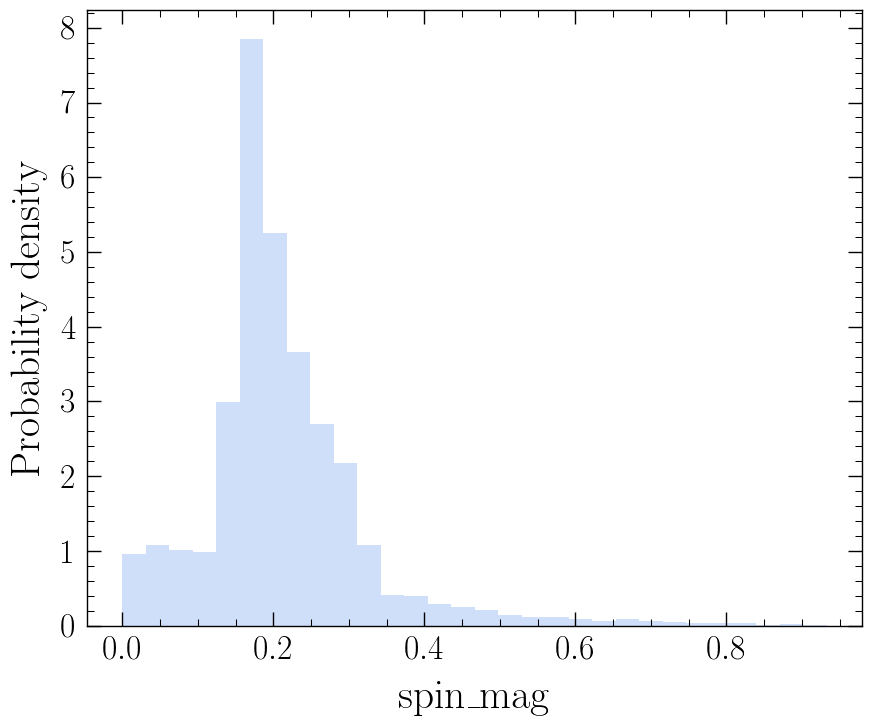

In [8]:
# Plot
plt.figure(figsize=(10,8))
#plt.plot(x, density_1, label='KDE')
plt.hist(chi_f, bins=30, density=True, alpha=0.3, label='Posterior samples')
plt.xlabel('spin_mag')
plt.ylabel('Probability density')
#plt.title('KDE of LIGO spin_mag posterior, BH 1')
#plt.text(0.8, 0.55, r"MC 121", transform=plt.gca().transAxes,ha='right', va='top', fontsize=20)

#plt.legend()
plt.show()

In [10]:
#now do the analysis with this

chi_inj = chi_f

# Fit Beta(α, β) to the samples
# We fit only shape parameters; domain is fixed to [0,1]
a1, b1, _, _ = beta.fit(chi_inj, floc=0, fscale=1)
#a2, b2, _, _ = beta.fit(spin2, floc=0, fscale=1)

beta1 = beta(a1, b1, loc=0, scale=1)
#beta2 = beta(a2, b2, loc=0, scale=1)

print(beta1)


In [11]:
class SpinEventLikelihood(bilby.Likelihood):
    def __init__(self, beta_spin_1):
        parameters = dict(
            mu=None,
            M1=None,
            chi1=None
        )
        super().__init__(parameters=parameters)
        self.beta_spin_1 = beta_spin_1
        #self.beta_spin_2 = beta_spin_2

    def log_likelihood(self):
        p = self.parameters

        # compute secondary mass
        M_init_1 = p['M1']
        #M_init_2 = p['q'] * M_init_1
        
        # predicted spins
        chi_pred_1 = get_merger_spin(p['mu'], M_init_1, p['chi1'], tau_s)
        #chi_pred_2 = get_merger_spin(p['mu'], M_init_2, p['chi2'], tau_s)

        # evaluate Beta pdfs (numerically stable)
        logL1 = self.beta_spin_1.logpdf(chi_pred_1)
        #logL2 = self.beta_spin_2.logpdf(chi_pred_2)

        #return float(logL1 + logL2)
        return float(logL1)

class CatalogSpinLikelihood(bilby.Likelihood):
    """
    Catalog likelihood with a single shared parameter 'm_a' and per-event nuisance parameters.
    event_likelihoods: list[SpinEventLikelihood]
    """

    def __init__(self, event_likelihoods):
        # base parameters: shared m_a
        parameters = {"mu": None}

        self.event_likelihoods = event_likelihoods
        self.nevents = len(event_likelihoods)

        # add per-event nuisance parameters to the top-level parameter dict
        for i in range(self.nevents):
            parameters[f"M1_{i}"] = None
            #parameters[f"q_{i}"] = None
            parameters[f"chi1_{i}"] = None
            #parameters[f"chi2_{i}"] = None

        super().__init__(parameters=parameters)

    def log_likelihood(self):
        p = self.parameters
        logL = 0.0
        for i, ev in enumerate(self.event_likelihoods):
            # feed the shared m_a and this event's nuisance params into the event likelihood
            ev.parameters["mu"] = p["mu"]
            ev.parameters["M1"] = p[f"M1_{i}"]
            #ev.parameters["q"] = p[f"q_{i}"]
            ev.parameters["chi1"] = p[f"chi1_{i}"]
            #ev.parameters["chi2"] = p[f"chi2_{i}"]

            logL += ev.log_likelihood()
        return float(logL)

tau_s = 1e10 * yr_to_s

In [12]:

event_likes = []

event_likes.append(SpinEventLikelihood(beta1))


# build catalog likelihood (if you want a catalog with a single event)
catalog_like = CatalogSpinLikelihood(event_likes)



priors = dict()

# Shared axion mass
priors["mu"] = bilby.core.prior.LogUniform(
    minimum=1e-16, maximum=1e-8, name="mu"
) #normally 1e-13 to 1e-11 eV

for i in range(len(event_likes)):
    priors[f"M1_{i}"] = bilby.core.prior.PowerLaw(
        #alpha=-2.35, minimum=10, maximum=100, name=f"M1_{i}"
        alpha=-2.35, minimum=5, maximum=50, name=f"M1_{i}" #need to also ensure M2 in this range
    )

    # priors[f"q_{i}"] = bilby.core.prior.Uniform(
    #     #minimum=0.0, maximum=1.0, name=f"q_{i}"
    #     minimum=0.1, maximum=1.0, name=f"q_{i}"
    # )

    priors[f"chi1_{i}"] = bilby.core.prior.Uniform(
        minimum=0.0, maximum=1.0, name=f"chi1_{i}"
    )

    # priors[f"chi2_{i}"] = bilby.core.prior.Uniform(
    #     minimum=0.0, maximum=1.0, name=f"chi2_{i}"
    # )

likelihood = catalog_like

In [ ]:
#labelstr = 'GWTC3b_' + event_str
labelstr = 'siginj'

result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler='dynesty',   # or 'pymultinest'
    nlive=1000,
    label=labelstr,
    outdir='outdirs/outdir_sig_inj'
)

03:32 bilby INFO    : Running for label 'siginj', output will be saved to 'outdirs/outdir_sig_inj'
03:32 bilby INFO    : Analysis priors:
03:32 bilby INFO    : mu=LogUniform(minimum=1e-16, maximum=1e-08, name='mu', latex_label='mu', unit=None, boundary=None)
03:32 bilby INFO    : M1_0=PowerLaw(alpha=-2.35, minimum=5, maximum=50, name='M1_0', latex_label='M1_0', unit=None, boundary=None)
03:32 bilby INFO    : chi1_0=Uniform(minimum=0.0, maximum=1.0, name='chi1_0', latex_label='chi1_0', unit=None, boundary=None)
03:32 bilby INFO    : Analysis likelihood class: <class '__main__.CatalogSpinLikelihood'>
03:32 bilby INFO    : Analysis likelihood noise evidence: nan
/tmp/ipykernel_3894629/394581292.py:29: RuntimeWarning: invalid value encountered in sqrt
  r_plus = M * Msol_to_kg * (1 + np.sqrt(1 - chi**2))
/global/home/users/osning/.conda/envs/frankenstein/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by 

1it [00:00, ?it/s]

/tmp/ipykernel_3894629/394581292.py:29: RuntimeWarning: invalid value encountered in sqrt
  r_plus = M * Msol_to_kg * (1 + np.sqrt(1 - chi**2))
/global/home/users/osning/.conda/envs/frankenstein/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


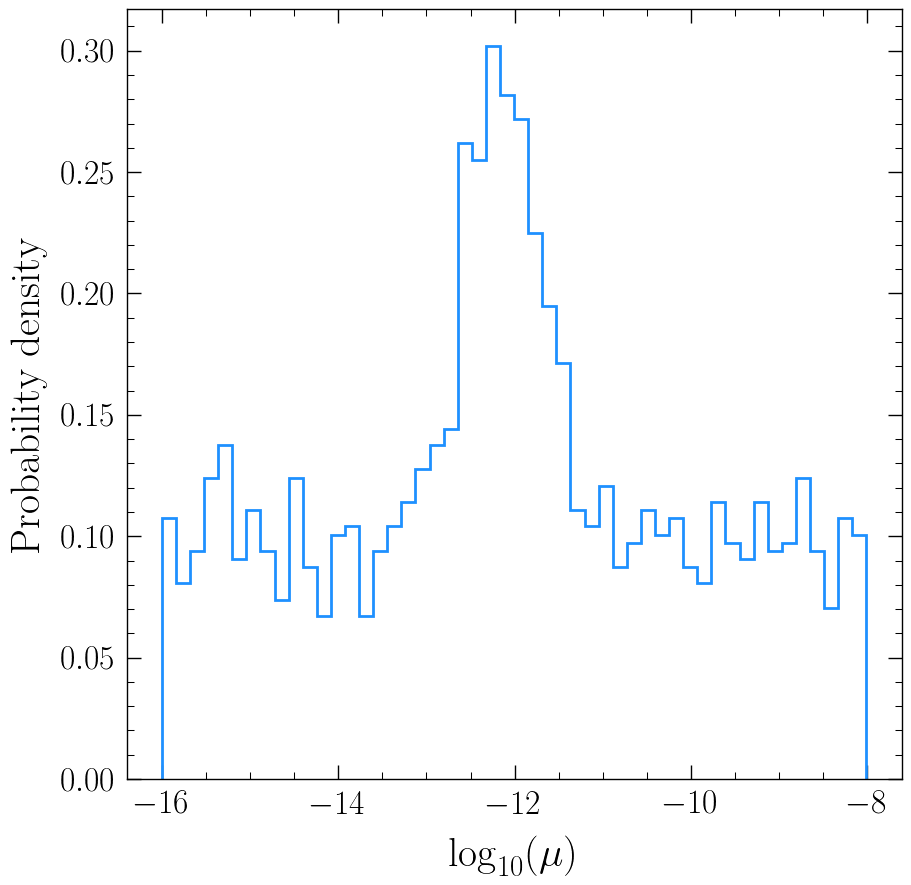

In [18]:
result = bilby.core.result.read_in_result("outdirs/outdir_sig_inj/siginj_result.json")
result.posterior["log_mu"] = np.log10(result.posterior["mu"])

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot 1D histogram / posterior
ax.hist(result.posterior["log_mu"], bins=50, density=True, histtype='step', color='dodgerblue', lw=2)

ax.set_xlabel(r"$\log_{10}(\mu)$")
ax.set_ylabel("Probability density")

#fig.text(0.8, 0.25, r"MC 399", transform=plt.gca().transAxes,ha='right', va='top', fontsize=20)

plt.show() 

# Signal Injection

We need to actually simulate an event and do some of the forward modeling. 

For now, let's take one event with a delta function measured spin posterior (i.e. observed is true). Let's ensure we disfavor some axion masses from this.

In [8]:

# Constants
#yr_to_s = 3.154e7
tau_s = 1e10 * yr_to_s
mu = 1.0e-12   # eV

# Your function (assumed defined elsewhere)
# get_merger_spin(mu, M, chi_i, tau_s)

# ---------------------------
# 1. Draw initial spins χ_i ~ U(0,1)
# ---------------------------
N = 1000
#chi_i = np.random.uniform(0, 1, N)
chi_i = np.ones(N) * 0.9 #say a high spin for now

# ---------------------------
# 2. Draw masses from M^{-2.35}, M in [5, 50]
#    Using inverse CDF sampling
# ---------------------------

alpha = 2.35  # slope
Mmin = 5.0
Mmax = 50.0

# General inverse transform for p(M) ∝ M^{-α}
def sample_power_law(N, Mmin, Mmax, alpha):
    # For α != 1
    expo = 1.0 - alpha
    r = np.random.uniform(0, 1, N)
    return ( (Mmax**expo - Mmin**expo)*r + Mmin**expo )**(1.0/expo)

#M = sample_power_law(N, Mmin, Mmax, alpha)

#let's say we have an exact mass measurement
M = np.ones(N) * 20.0 #let's say it's 20 M_sol


# ---------------------------
# 3. Compute final spins χ_f = get_merger_spin(...)
# ---------------------------

chi_f = np.array([get_merger_spin(mu, M[i], chi_i[i], tau_s) for i in range(N)])

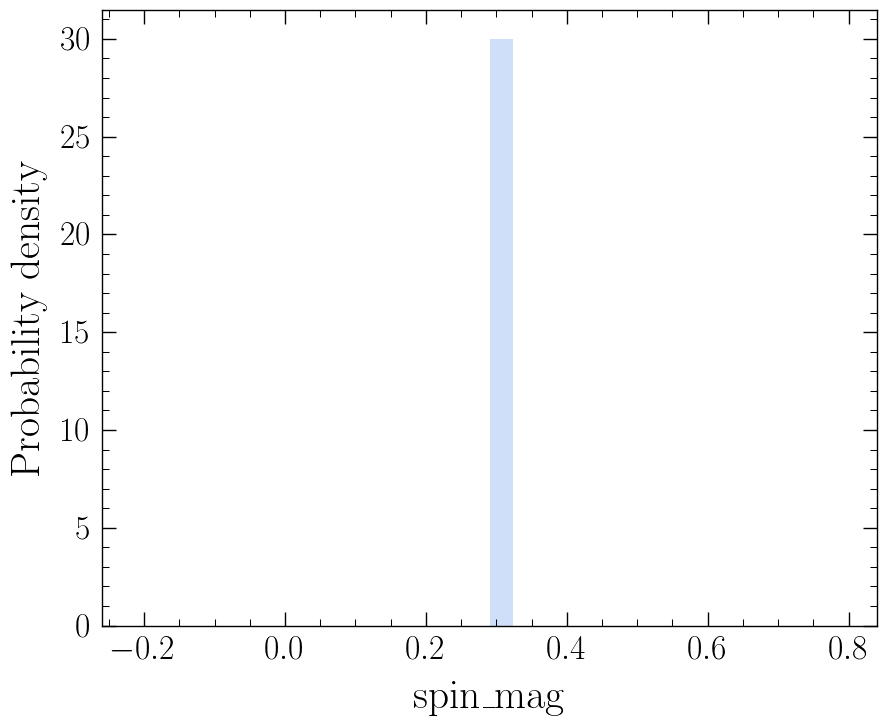

In [9]:
# Plot
plt.figure(figsize=(10,8))
#plt.plot(x, density_1, label='KDE')
plt.hist(chi_f, bins=30, density=True, alpha=0.3, label='Posterior samples')
plt.xlabel('spin_mag')
plt.ylabel('Probability density')
#plt.title('KDE of LIGO spin_mag posterior, BH 1')
#plt.text(0.8, 0.55, r"MC 121", transform=plt.gca().transAxes,ha='right', va='top', fontsize=20)

#plt.legend()
plt.show()

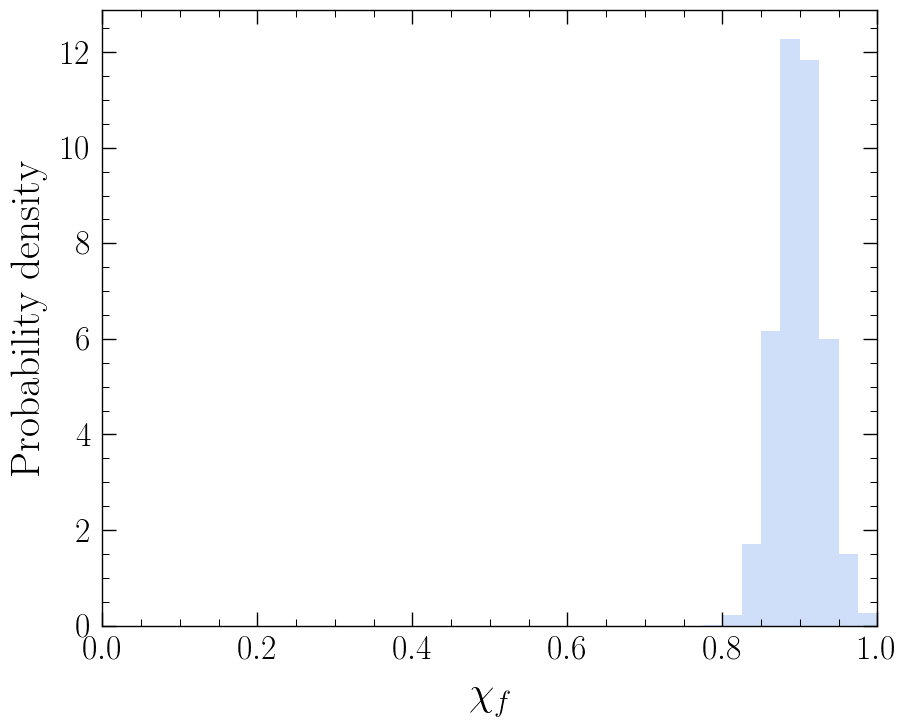

In [46]:
# Parameters
mean = 0.9
sigma = 0.03
N = 10000  # number of samples for smooth histogram

# Draw samples
samples = np.random.normal(mean, sigma, N)

# Optional: enforce spin bounds [0, 1]
samples = samples[(samples >= 0) & (samples <= 1)]

bins = np.linspace(0, 1, 41)  # 40 bins from 0 to 1


plt.figure(figsize=(10,8))
#plt.plot(x, density_1, label='KDE')
plt.hist(samples, bins=bins, density=True, alpha=0.3, label='Posterior samples')
plt.xlabel(r'$\chi_f$')
plt.ylabel('Probability density')
plt.xlim([0, 1.0])
#plt.title('KDE of LIGO spin_mag posterior, BH 1')
#plt.text(0.8, 0.55, r"MC 121", transform=plt.gca().transAxes,ha='right', va='top', fontsize=20)

#plt.legend()
plt.show()

In [34]:
#now do the analysis with this

chi_inj = chi_f

# # Fit Beta(α, β) to the samples
# # We fit only shape parameters; domain is fixed to [0,1]
# a1, b1, _, _ = beta.fit(chi_inj, floc=0, fscale=1)
# #a2, b2, _, _ = beta.fit(spin2, floc=0, fscale=1)

# beta1 = beta(a1, b1, loc=0, scale=1)
# #beta2 = beta(a2, b2, loc=0, scale=1)

# print(beta1)

#chi0 = np.median(chi_f)

chi0 = 0.2
print(chi0)


0.2


In [35]:
class SpinEventGaussianLikelihood(bilby.Likelihood):
    def __init__(self, chi0, sigma):
        parameters = dict(mu=None, M1=None, chi1=None)
        super().__init__(parameters=parameters)
        self.chi0 = float(chi0)
        self.sigma = float(sigma)
        self.log_norm = -0.5 * np.log(2 * np.pi * self.sigma**2)

    def log_likelihood(self):
        p = self.parameters
        M_init_1 = p['M1']
        chi_pred_1 = get_merger_spin(p['mu'], M_init_1, p['chi1'], tau_s)

        # Gaussian log-likelihood
        resid = chi_pred_1 - self.chi0
        return float(self.log_norm - 0.5 * (resid**2) / (self.sigma**2))

class CatalogSpinLikelihood(bilby.Likelihood):
    """
    Catalog likelihood with a single shared parameter 'm_a' and per-event nuisance parameters.
    event_likelihoods: list[SpinEventLikelihood]
    """

    def __init__(self, event_likelihoods):
        # base parameters: shared m_a
        parameters = {"mu": None}

        self.event_likelihoods = event_likelihoods
        self.nevents = len(event_likelihoods)

        # add per-event nuisance parameters to the top-level parameter dict
        for i in range(self.nevents):
            parameters[f"M1_{i}"] = None
            #parameters[f"q_{i}"] = None
            parameters[f"chi1_{i}"] = None
            #parameters[f"chi2_{i}"] = None

        super().__init__(parameters=parameters)

    def log_likelihood(self):
        p = self.parameters
        logL = 0.0
        for i, ev in enumerate(self.event_likelihoods):
            # feed the shared m_a and this event's nuisance params into the event likelihood
            ev.parameters["mu"] = p["mu"]
            ev.parameters["M1"] = p[f"M1_{i}"]
            #ev.parameters["q"] = p[f"q_{i}"]
            ev.parameters["chi1"] = p[f"chi1_{i}"]
            #ev.parameters["chi2"] = p[f"chi2_{i}"]

            logL += ev.log_likelihood()
        return float(logL)

tau_s = 1e10 * yr_to_s

In [36]:

event_likes = []

#event_likes.append(SpinEventLikelihood(beta1))
event_likes.append(SpinEventGaussianLikelihood(chi0=chi0, sigma=0.03))


# build catalog likelihood (if you want a catalog with a single event)
catalog_like = CatalogSpinLikelihood(event_likes)



priors = dict()

# Shared axion mass
priors["mu"] = bilby.core.prior.LogUniform(
    minimum=1e-16, maximum=1e-8, name="mu"
) #normally 1e-13 to 1e-11 eV

for i in range(len(event_likes)):
    priors[f"M1_{i}"] = bilby.core.prior.PowerLaw(
        #alpha=-2.35, minimum=10, maximum=100, name=f"M1_{i}"
        alpha=-2.35, minimum=5, maximum=50, name=f"M1_{i}" #need to also ensure M2 in this range
    )

    # priors[f"q_{i}"] = bilby.core.prior.Uniform(
    #     #minimum=0.0, maximum=1.0, name=f"q_{i}"
    #     minimum=0.1, maximum=1.0, name=f"q_{i}"
    # )

    priors[f"chi1_{i}"] = bilby.core.prior.Uniform(
        minimum=0.0, maximum=1.0, name=f"chi1_{i}"
    )

    # priors[f"chi2_{i}"] = bilby.core.prior.Uniform(
    #     minimum=0.0, maximum=1.0, name=f"chi2_{i}"
    # )

likelihood = catalog_like

In [37]:
#labelstr = 'GWTC3b_' + event_str
labelstr = 'siginj_delta_0p2_sigma0p3' #note sigma0p3 means sigma=0.03

result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler='dynesty',   # or 'pymultinest'
    nlive=1000,
    label=labelstr,
    outdir='outdirs/outdir_sig_inj'
)

04:43 bilby INFO    : Running for label 'siginj_delta_0p2_sigma0p3', output will be saved to 'outdirs/outdir_sig_inj'
04:43 bilby INFO    : Analysis priors:
04:43 bilby INFO    : mu=LogUniform(minimum=1e-16, maximum=1e-08, name='mu', latex_label='mu', unit=None, boundary=None)
04:43 bilby INFO    : M1_0=PowerLaw(alpha=-2.35, minimum=5, maximum=50, name='M1_0', latex_label='M1_0', unit=None, boundary=None)
04:43 bilby INFO    : chi1_0=Uniform(minimum=0.0, maximum=1.0, name='chi1_0', latex_label='chi1_0', unit=None, boundary=None)
04:43 bilby INFO    : Analysis likelihood class: <class '__main__.CatalogSpinLikelihood'>
04:43 bilby INFO    : Analysis likelihood noise evidence: nan
/tmp/ipykernel_3274306/394581292.py:29: RuntimeWarning: invalid value encountered in sqrt
  r_plus = M * Msol_to_kg * (1 + np.sqrt(1 - chi**2))
/global/home/users/osning/.conda/envs/frankenstein/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progre

1it [00:00, ?it/s]

04:48 bilby INFO    : Written checkpoint file outdirs/outdir_sig_inj/siginj_delta_0p2_sigma0p3_resume.pickle
04:48 bilby INFO    : Rejection sampling nested samples to obtain 2044 posterior samples
04:48 bilby INFO    : Sampling time: 0:05:41.397560


04:48 bilby INFO    : Summary of results:
nsamples: 2044
ln_noise_evidence:    nan
ln_evidence:  0.262 +/-  0.056
ln_bayes_factor:    nan +/-  0.056



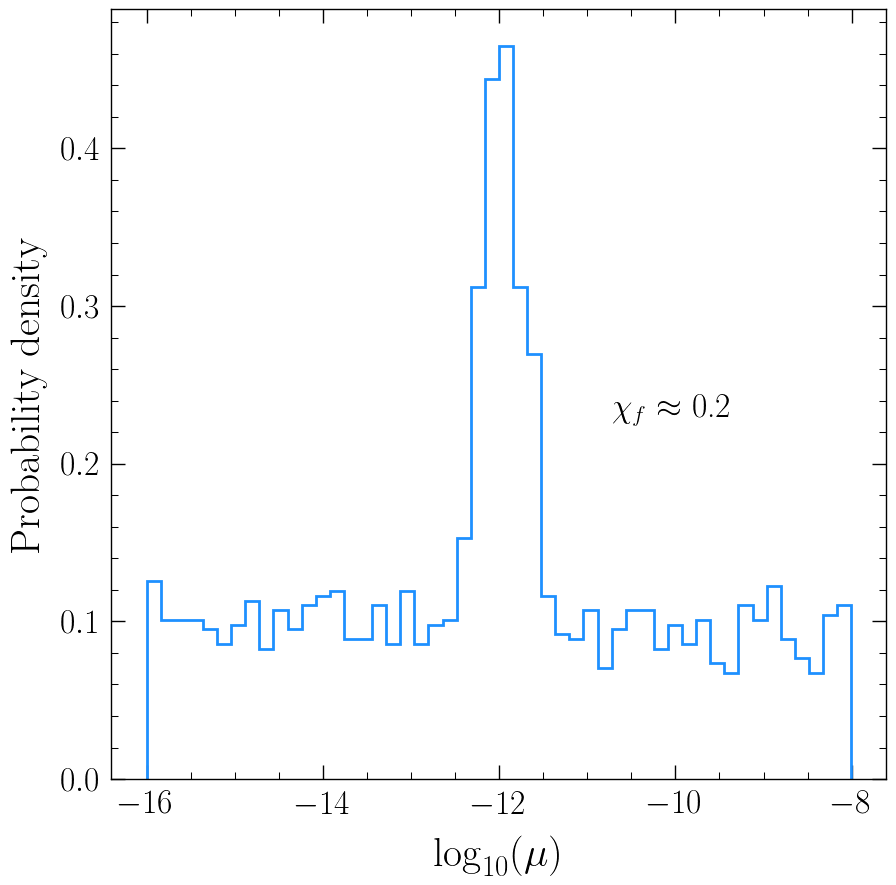

In [41]:
result = bilby.core.result.read_in_result("outdirs/outdir_sig_inj/siginj_delta_0p2_sigma0p3_result.json")
result.posterior["log_mu"] = np.log10(result.posterior["mu"])

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot 1D histogram / posterior
ax.hist(result.posterior["log_mu"], bins=50, density=True, histtype='step', color='dodgerblue', lw=2)

ax.set_xlabel(r"$\log_{10}(\mu)$")
ax.set_ylabel("Probability density")

fig.text(0.8, 0.5, r"$\chi_f \approx$ 0.2", transform=plt.gca().transAxes,ha='right', va='top', fontsize=24)

plt.show() 

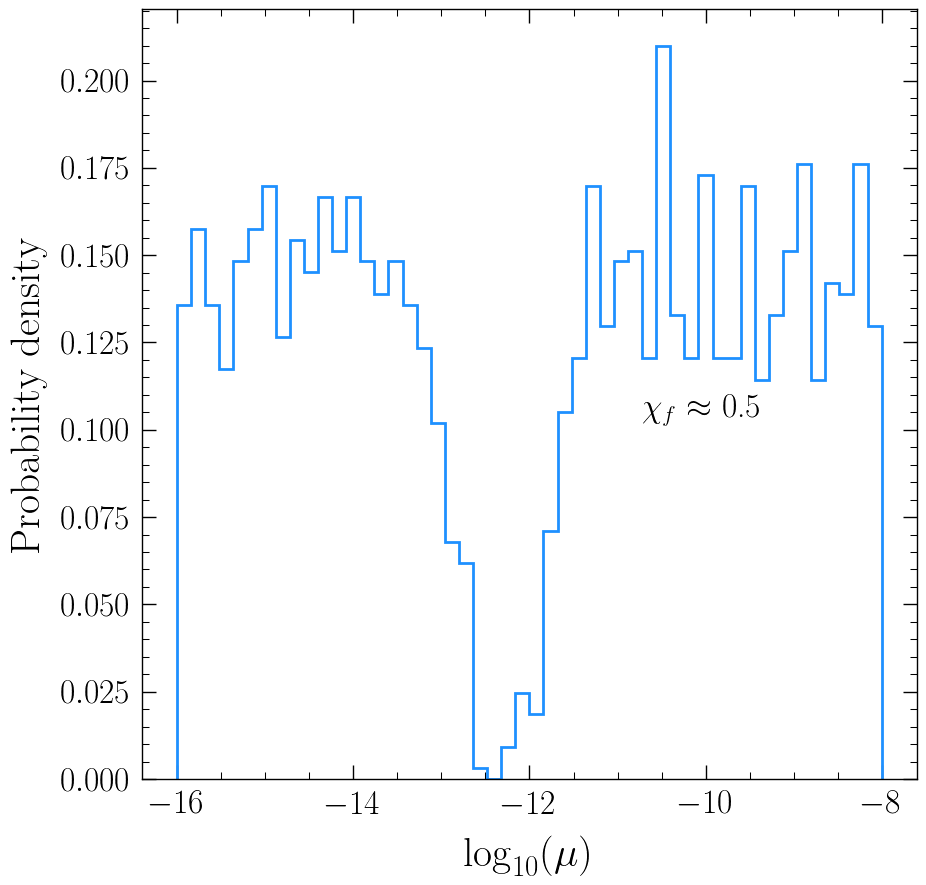

In [42]:
result = bilby.core.result.read_in_result("outdirs/outdir_sig_inj/siginj_delta_0p5_sigma0p3_result.json")
result.posterior["log_mu"] = np.log10(result.posterior["mu"])

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot 1D histogram / posterior
ax.hist(result.posterior["log_mu"], bins=50, density=True, histtype='step', color='dodgerblue', lw=2)

ax.set_xlabel(r"$\log_{10}(\mu)$")
ax.set_ylabel("Probability density")

fig.text(0.8, 0.5, r"$\chi_f \approx$ 0.5", transform=plt.gca().transAxes,ha='right', va='top', fontsize=24)

plt.show() 

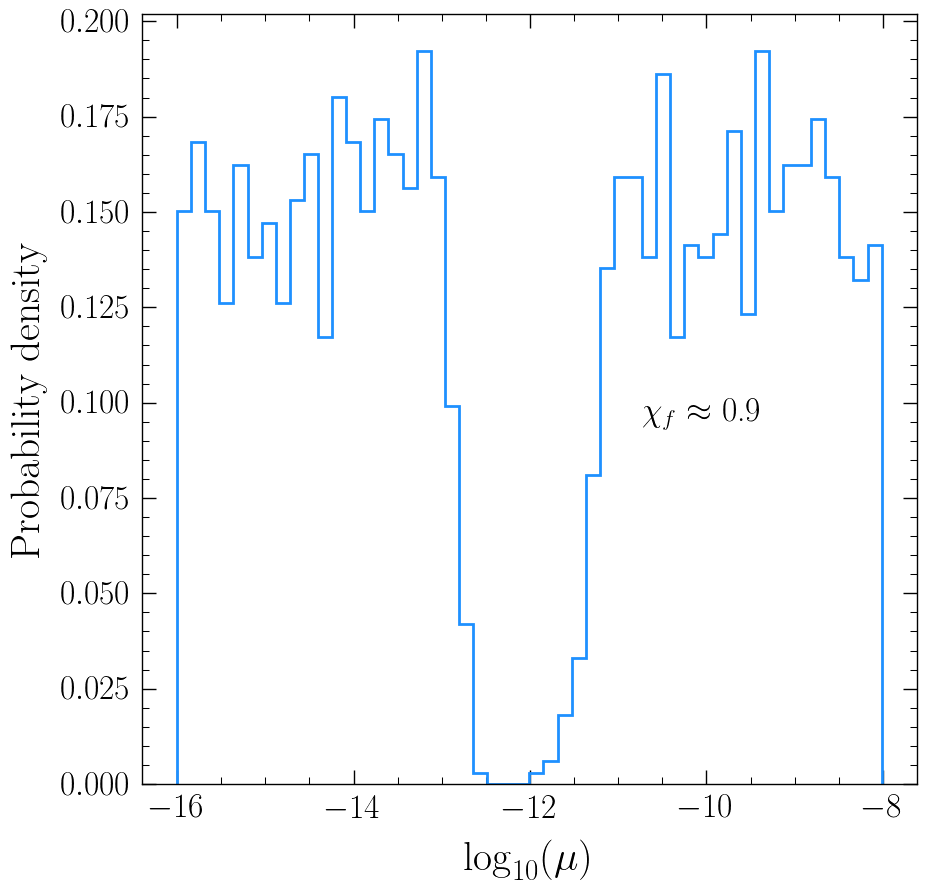

In [43]:
result = bilby.core.result.read_in_result("outdirs/outdir_sig_inj/siginj_delta_0p9_sigma0p3_result.json")
result.posterior["log_mu"] = np.log10(result.posterior["mu"])

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot 1D histogram / posterior
ax.hist(result.posterior["log_mu"], bins=50, density=True, histtype='step', color='dodgerblue', lw=2)

ax.set_xlabel(r"$\log_{10}(\mu)$")
ax.set_ylabel("Probability density")

fig.text(0.8, 0.5, r"$\chi_f \approx$ 0.9", transform=plt.gca().transAxes,ha='right', va='top', fontsize=24)

plt.show() 

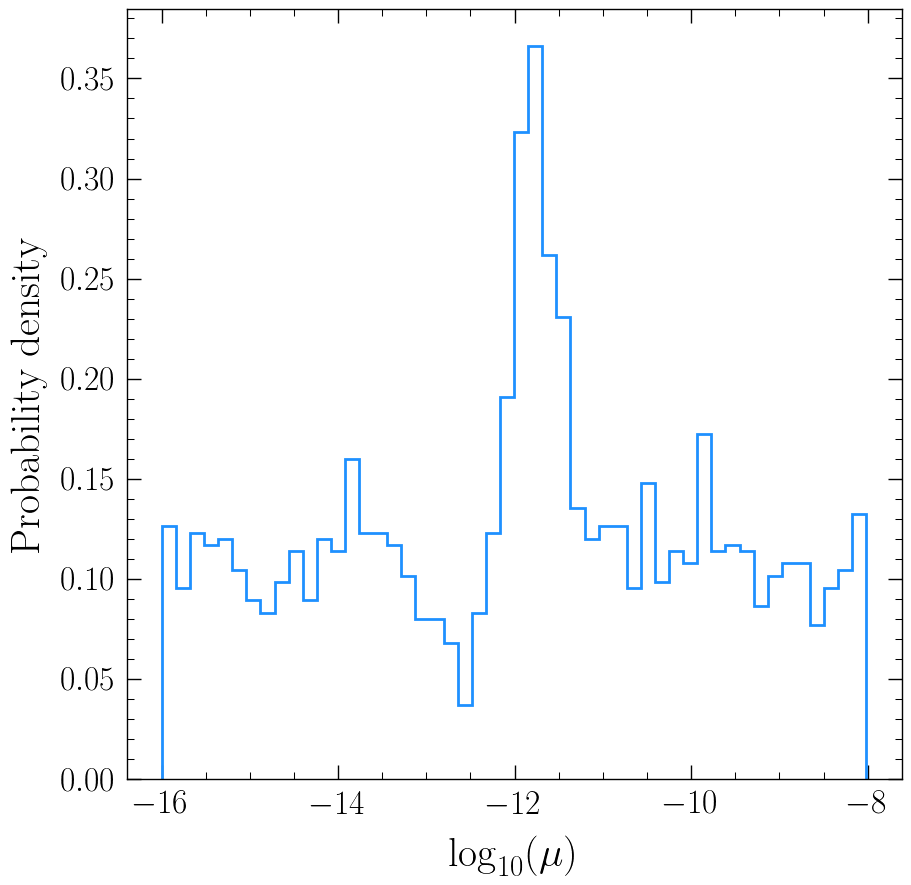

In [19]:
result = bilby.core.result.read_in_result("outdirs/outdir_sig_inj/siginj_delta1_result.json")
result.posterior["log_mu"] = np.log10(result.posterior["mu"])

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot 1D histogram / posterior
ax.hist(result.posterior["log_mu"], bins=50, density=True, histtype='step', color='dodgerblue', lw=2)

ax.set_xlabel(r"$\log_{10}(\mu)$")
ax.set_ylabel("Probability density")

#fig.text(0.8, 0.25, r"MC 399", transform=plt.gca().transAxes,ha='right', va='top', fontsize=20)

plt.show() 